# TAC Depth Discrimination Analysis: Accuracy Coded by Verbal Judgement Data

In [63]:
import os 
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy 
import scipy.stats as stats
from scipy.stats import sem 
from mpl_toolkits.mplot3d import Axes3D # <--- This is important for 3d plotting 
from sklearn.linear_model import LinearRegression


In [64]:
def combineCSVs(datafolder, num_discrim_trials):
    """
    Combine all participant data into one pandas df
    OR 
    Create df for single participant file 
    
    returns:
        (1) combined dataframe of all discrimination data 
        (2) combined dataframe of all scene property rating data 
    """
    #checks if path is a file
    isFile = os.path.isfile(datafolder)

    #checks if path is a directory
    
    isDirectory = os.path.isdir(datafolder)
    
    if isDirectory == True:
        discrim_data = []
        properties_data = []
        for filename in os.listdir(datafolder):
            if 'csv' in filename:
                path = datafolder + "/" + filename
                df = pd.read_csv(path, index_col=None, header=0)
                
                df_discrim = df[0:num_discrim_trials]
                discrim_data.append(df_discrim)
                # row 96 should be ignored - artifact of logging 
                df_properties = df[num_discrim_trials+1:]
                properties_data.append(df_properties)
                

        discrim_frame = pd.concat(discrim_data, axis=0, ignore_index=True)
        properties_frame = pd.concat(properties_data, axis=0, ignore_index=True)
        
    if isFile == True:
        if 'csv' in datafolder:
            df = pd.read_csv(datafolder, index_col=None, header=0)
            df_discrim = df[0:num_discrim_trials]
            discrim_data.append(df_discrim)
            # row 96 should be ignored - artifact of logging 
            df_properties = df[num_discrim_trials+1:]
            properties_data.append(df_properties)
 
    return discrim_frame, properties_frame

In [65]:
data_path = '/Users/pmahableshwarkar/Documents/Depth_Project/depth_discrimination/TAC_depth_discrimination_MTurk/data'


In [66]:
raw_discrim, raw_ratings = combineCSVs(data_path, 40)

In [67]:
all_subjIDs = raw_discrim.subjID.unique()
len(all_subjIDs)

342

In [68]:
raw_discrim

,subjID,experimentName,versionName,sequenceName,url,selected_row,windowWidth,windowHeight,screenWidth,screenHeight,...,trial_RT,log_fixation,log_sceneDuration1,log_mask1,log_sceneDuration2,log_mask2,experimentTime,totalTime,age,gender
0,515920.0,DepthScenes,v2_duration_discrimination,discrim_jsons/v2_shuffled_g0.json,http://54.210.137.18/DepthDuration/v2_depth_di...,4.0,1700.0,850.0,1700.0,956.0,...,2148.0,1000.0,252.0,999.0,249.0,501.0,NaN,1922930,35,Woman
1,515920.0,DepthScenes,v2_duration_discrimination,discrim_jsons/v2_shuffled_g0.json,http://54.210.137.18/DepthDuration/v2_depth_di...,4.0,1700.0,850.0,1700.0,956.0,...,2212.0,1001.0,249.0,1001.0,250.0,500.0,NaN,1922930,35,Woman
2,515920.0,DepthScenes,v2_duration_discrimination,discrim_jsons/v2_shuffled_g0.json,http://54.210.137.18/DepthDuration/v2_depth_di...,4.0,1700.0,850.0,1700.0,956.0,...,1996.0,1001.0,249.0,1000.0,249.0,501.0,NaN,1922930,35,Woman
3,515920.0,DepthScenes,v2_duration_discrimination,discrim_jsons/v2_shuffled_g0.json,http://54.210.137.18/DepthDuration/v2_depth_di...,4.0,1700.0,850.0,1700.0,956.0,...,34432.0,1002.0,998.0,1000.0,1001.0,499.0,NaN,1922930,35,Woman
4,515920.0,DepthScenes,v2_duration_discrimination,discrim_jsons/v2_shuffled_g0.json,http://54.210.137.18/DepthDuration/v2_depth_di...,4.0,1700.0,850.0,1700.0,956.0,...,2534.0,1002.0,1000.0,999.0,1000.0,500.0,NaN,1922930,35,Woman
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13675,636794.0,DepthScenes,v2_duration_discrimination,discrim_jsons/v2_shuffled_g0_dr.json,http://54.210.137.18/DepthDuration/v2_depth_di...,1.0,1536.0,754.0,1536.0,864.0,...,1929.0,1006.0,997.0,1001.0,999.0,507.0,NaN,380364,63,Man
13676,636794.0,DepthScenes,v2_duration_discrimination,discrim_jsons/v2_shuffled_g0_dr.json,http://54.210.137.18/DepthDuration/v2_depth_di...,1.0,1536.0,754.0,1536.0,864.0,...,2242.0,1005.0,997.0,1013.0,1000.0,491.0,NaN,380364,63,Man
13677,636794.0,DepthScenes,v2_duration_discrimination,discrim_jsons/v2_shuffled_g0_dr.json,http://54.210.137.18/DepthDuration/v2_depth_di...,1.0,1536.0,754.0,1536.0,864.0,...,1595.0,1015.0,989.0,997.0,1010.0,491.0,NaN,380364,63,Man
13678,636794.0,DepthScenes,v2_duration_discrimination,discrim_jsons/v2_shuffled_g0_dr.json,http://54.210.137.18/DepthDuration/v2_depth_di...,1.0,1536.0,754.0,1536.0,864.0,...,1882.0,1015.0,1002.0,998.0,1000.0,489.0,NaN,380364,63,Man


In [69]:
all_ages = raw_discrim.age.unique()
all_ages

array([  35,   38,   30,   28,   42,   41,   51,   26,   34,   69,   43,
         39,   48,   45,   55,   60,   50,   27,   33,   47,   53,   70,
         32,   31,   29,   37,   54,   44,   24,   68,   62,   57,   40,
         22,   36,   46,   63,   49,   67,   59,   61,   52,   66,   56,
         72,   64,   58,   25, 1987, 1974])

## <font color='red'> Data Cleaning </font> 



In [70]:
def catchTrial_cleaning(df, correct_requirement, catch_stimuli):
    '''
    Participants complete 8 catch trials total to ensure that they are doing the task.
    If less than 7/8 catch trials are correct, the participant is excluded.  
    '''
    all_subjIDs = df.subjID.unique()
    remove = []
    subj_sequence = {}
    df2_list = []
    sequence_count = {'discrim_jsons/v2_shuffled_g0_dr.json': 0,
                      'discrim_jsons/v2_shuffled_g0_rotated_dr.json': 0,
                      'discrim_jsons/v2_shuffled_g0_rotated.json': 0, 
                      'discrim_jsons/v2_shuffled_g0.json': 0}
    for subj in all_subjIDs:
#         print(subj)
        count_correct = 0
        subj_df = df.loc[df['subjID'] == subj]
        cleaned_subj_df = subj_df.copy(deep=True) # prevent setting with copy warning
        # 
        subj_sequence[subj] = subj_df.sequenceName.unique()[0]
        
        # remove trials that are outside the outlier range
        c = 0
        c_missed = 0
        for idx, row in subj_df.iterrows():
            stim1 = row['stimulus_0']
            stim2 = row['stimulus_1']
            # TEMP SOLUTION FOR RANDOM PHP DATA SAVING PROBLEM 
            if type(stim1) == str:
                if stim1.split('/')[1] in catch_stimuli or stim2.split('/')[1] in catch_stimuli:
                    ####### VERSION WHERE CATCH TRIALS ARE ATTENTION CHECK: IMAGE 1 IS THE SAME AS IMAGE 2
                    c += 1
                    if row["discrim_choice"] == 3:
#                         print(row["discrim_choice"])
                        count_correct += 1
#                     else:
#                         print(row["discrim_choice"])
                    # remove catch trial 
                    cleaned_subj_df.drop([idx], inplace=True)
    #                 print(depth0, depth1, correct_choice, choice)
#         print(c_missed, 'Number of catch trials where participants did not see the target')
#         print(c)
#         print(count_correct)
        if count_correct < correct_requirement:
#             print('Number correct:', count_correct)
            remove.append(subj)
        else:
            sequence_count[subj_df.sequenceName.unique()[0]] += 1
        
        df2_list.append(cleaned_subj_df)
    
    df2 = pd.concat(df2_list)
    print("Number of participants that did not pass the catch trial check:", len(remove))
    print("Participants that were removed:",remove)
    print("Sequences that need to be replaced:")
#     for subj in remove:
#         print(subj_sequence[subj])
    print("Sequence count:")
    print(sequence_count)
    for index, row in df2.iterrows():
        if row['subjID'] in remove:
            df2.drop(index, inplace=True)
    
    return df2
    
    

In [71]:
all_catch_stim = ['000375_2014-06-08_11-17-29_260595134347_rgbf000133-resize_2',
              '000569_2014-06-09_22-51-47_260595134347_rgbf000141-resize_3',
              '000787_2014-06-08_22-33-53_260595134347_rgbf000175-resize_1',
              '002072_2014-06-24_21-48-06_260595134347_rgbf000115-resize_0',
              '002364_2014-06-28_20-11-05_260595134347_rgbf000042-resize_0',
              '002675_2014-06-13_16-08-49_094959634447_rgbf000151-resize_2',
              '003125_2014-05-12_10-39-22_094959634447_rgbf000100-resize_0',
              '003395_2014-05-20_15-39-18_094959634447_rgbf000101-resize_0',
              '000454_2014-06-08_16-37-28_260595134347_rgbf000048-resize_2',
              '000868_2014-06-09_20-49-52_260595134347_rgbf000064-resize_4',
              '000953_2014-06-08_11-42-19_260595134347_rgbf000083-resize_0',
              '001012_2014-06-08_23-19-38_260595134347_rgbf000057-resize_0',
              '001170_2014-06-17_15-43-44_260595134347_rgbf000096-resize_6',
              '001222_2014-06-17_16-24-06_260595134347_rgbf000073-resize_0',
              '001498_2014-06-19_17-45-14_260595134347_rgbf000129-resize_4',
              '001540_2014-06-20_17-01-05_260595134347_rgbf000086-resize_2']

In [72]:
catch_cleaned_discrim = catchTrial_cleaning(raw_discrim, 7, all_catch_stim)

Number of participants that did not pass the catch trial check: 138
Participants that were removed: [486536.0, 525639.0, 200176.0, 879488.0, 349467.0, 767956.0, 248936.0, 187827.0, 246251.0, 666765.0, 589497.0, 504937.0, 882991.0, 312968.0, 605641.0, 807617.0, 466959.0, 286299.0, 357475.0, 983837.0, 499055.0, 679588.0, 968513.0, 146591.0, 428536.0, 316377.0, 864671.0, 746604.0, 420127.0, 971285.0, 523130.0, 794012.0, 705779.0, 516517.0, 892757.0, 479873.0, 642287.0, 700748.0, 599134.0, 539797.0, 766102.0, 236381.0, 881835.0, 191904.0, 125847.0, 275426.0, 703443.0, 791202.0, 892795.0, 934729.0, 396314.0, 176209.0, 812817.0, 838754.0, 302212.0, 950533.0, 212783.0, 885104.0, 432975.0, 953854.0, 657330.0, 197265.0, 279980.0, 680309.0, 369409.0, 213896.0, 689595.0, 699000.0, 206132.0, 427295.0, 513194.0, 395226.0, 788117.0, 492312.0, 324499.0, 759268.0, 475461.0, 420850.0, 349004.0, 952380.0, 828849.0, 650562.0, 461791.0, 136201.0, 387516.0, 687000.0, 658998.0, 814613.0, 449871.0, 274937.0,

In [73]:
cleaned_ages = catch_cleaned_discrim.age.unique()
cleaned_ages

array([35, 30, 51, 34, 69, 38, 42, 45, 28, 55, 60, 50, 33, 53, 31, 29, 37,
       44, 24, 41, 68, 62, 43, 22, 46, 40, 63, 26, 48, 32, 49, 47, 54, 61,
       27, 66, 56, 72, 39, 36, 70, 59, 64, 58, 25, 57, 67])

In [74]:
def RT_cleaning(df, outlier_range, num_trials):
    all_subjIDs = df.subjID.unique()
    remove = []
    df2_list = []
    for subj in all_subjIDs:
        count = 0
        subj_df = df.loc[df['subjID'] == subj]
        cleaned_subj_df = subj_df.copy(deep=True) # prevent setting with copy warning
        
        # calculate subject's average trial RT
        average_trial_RT = subj_df["trial_RT"].mean()
        std_trial_RT = subj_df["trial_RT"].std()
        p_outlier_range = [(average_trial_RT - (3*std_trial_RT)), (average_trial_RT + (3*std_trial_RT))]
        
        # remove trials that are outside the outlier range
        for idx, row in subj_df.iterrows():
            RT = row['trial_RT']
            if RT < outlier_range[0]:
                cleaned_subj_df.drop([idx], inplace=True)
                count += 1
            if RT > outlier_range[1]:
                cleaned_subj_df.drop([idx], inplace=True)
                count += 1
            try:
                if RT < p_outlier_range[0]:
                    cleaned_subj_df.drop([idx], inplace=True)
                    count += 1
                if RT > p_outlier_range[1]:
                    cleaned_subj_df.drop([idx], inplace=True)
                    count += 1
            except:
                print("Trial already removed")
                
        threshold = math.floor(num_trials * 0.1)
        if count >= threshold:
            remove.append(subj)
        
        df2_list.append(cleaned_subj_df)
    
    df2 = pd.concat(df2_list)
    print("Number of Participants with 10% or more trials outside their RT range:", len(remove))
    
    for index, row in df2.iterrows():
        if row['subjID'] in remove:
            df2.drop(index, inplace=True)
    
    return df2


In [75]:
cleaned_discrim = RT_cleaning(catch_cleaned_discrim, [250,5000], 32)


# cleaned_discrim = RT_cleaning(catch_cleaned_discrim, [250,5000], 32)

Trial already removed
Trial already removed
Trial already removed
Trial already removed
Trial already removed
Trial already removed
Trial already removed
Trial already removed
Trial already removed
Trial already removed
Trial already removed
Trial already removed
Trial already removed
Trial already removed
Trial already removed
Trial already removed
Trial already removed
Trial already removed
Trial already removed
Trial already removed
Trial already removed
Trial already removed
Trial already removed
Trial already removed
Trial already removed
Trial already removed
Trial already removed
Trial already removed
Trial already removed
Trial already removed
Trial already removed
Trial already removed
Trial already removed
Trial already removed
Number of Participants with 10% or more trials outside their RT range: 12


In [76]:
def finalTrialCountCheck(df, num_trials):
    """
    If more then 10% of a participants data is missing, remove the participant
    """
    #List unique values in the df['subjID'] column\n",
    all_subjIDs = df.subjID.unique()
    remove = []
    for subj in all_subjIDs:
        subj_df = df.loc[df['subjID'] == subj]
        count_trials = len(subj_df.index)
        threshold_trials_remaining = num_trials - math.floor(num_trials * 0.1)
        
        if count_trials <= threshold_trials_remaining:
            remove.append(subj)
    print("Number of Participants with >= 10% trials removed:", len(remove))
    
    for index, row in df.iterrows():
        if row['subjID'] in remove:
            df.drop(index, inplace=True)
    
    print("Number of participants left:",len(df.subjID.unique()))
    
    return df

In [77]:
final_discrim = finalTrialCountCheck(cleaned_discrim, 32)

Number of Participants with >= 10% trials removed: 0
Number of participants left: 192


## Sequences that need replacing

Final N = 192 

Each sequence should have 48 participants

In [78]:
sequence_count = {}
for subj in final_discrim.subjID.unique():
    subj_df = final_discrim.loc[final_discrim['subjID'] == subj]
    sequence = subj_df.sequenceName.unique()[0]
    if sequence not in sequence_count.keys():
        sequence_count[sequence] = 1
    else:
        sequence_count[sequence] += 1
        
sequence_count

{'discrim_jsons/v2_shuffled_g0_dr.json': 48,
 'discrim_jsons/v2_shuffled_g0_rotated_dr.json': 48,
 'discrim_jsons/v2_shuffled_g0_rotated.json': 48,
 'discrim_jsons/v2_shuffled_g0.json': 48}

Need to collect:

{'discrim_jsons/v2_shuffled_g0_dr.json': 0,

 'discrim_jsons/v2_shuffled_g0_rotated_dr.json': 0,
 
 'discrim_jsons/v2_shuffled_g0_rotated.json': 0,
 
 'discrim_jsons/v2_shuffled_g0.json': 0}

In [177]:
# final list of subjects 
final_discrim.subjID.unique()

array([228728., 807208., 412083., 509688., 850447., 282973., 549702.,
       315165., 218453., 881035., 506102., 326488., 149233., 409675.,
       593083., 439919., 189696., 652893., 499784., 448318., 945974.,
       101085., 868542., 673597., 695299., 509364., 526040., 587621.,
       154237., 873482., 170866., 537644., 550483., 968398., 116785.,
       374289., 583569., 984970., 601731., 557596., 136209., 569496.,
       777255., 570653., 337469., 931400., 469243., 855688., 458147.,
       468752., 319731., 623661., 126249., 132769., 588045., 146023.,
       947579., 900787., 740391., 562207., 415504., 897685., 305022.,
       208718., 654905., 487859., 151211., 311185., 302050., 665528.,
       153669., 180116., 368082., 967964., 480536., 933073., 964434.,
       392858., 970307., 177380., 940410., 940154., 954125., 572003.,
       672325., 494769., 694658., 454005., 852332., 670472., 802992.,
       990279., 746934., 477361., 417317., 618864., 850004., 713572.,
       310205., 3572

# Correlation with Verbal Report data 

- For each discrimination trial, get the average difference between the verbal report for those scenes 
- Correlate that with the proportion correct for that trial 
- Is there better accuracy for scenes that have a larget percevied depth difference (using the verbal report data)?

## Individual Discriminations

In [79]:
def get_accuracy(df):
    """
    * ACCURACY BASED ON THE KINECT
    args:
        df  
    returns:
        proportion of correct responses, count of correct responses, count of total trials  
    """
    count_correct = 0
    count_incorrect = 0
    count_total = 0
    count_missed = 0
    for idx, row in df.iterrows():
        choice = row["discrim_choice"]
        if choice == 2.0:
            count_missed += 1
        else:    
            count_total += 1
            depth0 = row["actual_depth_0"]
            depth1 = row["actual_depth_1"]
            if depth0 < depth1:
                correct_choice = 0
            if depth0 > depth1:
                correct_choice = 1
            if depth0 == depth1:
                # case where depths are equal 
                correct_choice = None
            if choice == correct_choice:
                count_correct += 1
    
    return count_correct/count_total, count_correct, count_total, count_missed

def get_RT(df):
    """
    args:
        df  
    returns:
        array of RTs, avg RT and std   
    """
    list_RTs = []
    for idx, row in df.iterrows():   
        stimulus_duration = row['log_sceneDuration2']
        RT = row["trial_RT"] - stimulus_duration
        list_RTs.append(RT)
    
    list_RTs = np.array(list_RTs)
    
    return list_RTs, np.mean(list_RTs) ,np.std(list_RTs)

In [80]:
def depth_differences(df):
    """
    args:
        df  
    returns:
        array of depth differences, avg depth differences and std   
    """
    depth_diffs = []
    for idx, row in df.iterrows():
        depth0 = row["actual_depth_0"]
        depth1 = row["actual_depth_1"]
        
        diff = abs(depth0-depth1)
        depth_diffs.append(diff)
    
    depth_diffs = np.array(depth_diffs)
    
    return depth_diffs, np.mean(depth_diffs) ,np.std(depth_diffs)
    

In [81]:
all_depth_diffs = depth_differences(final_discrim)

# add depth difference column to dataframe 
final_discrim.insert(18, "depth_difference", all_depth_diffs[0])

In [82]:
def individual_discrimination_stats(df):
    '''
    Individual discrimination performance and RT 
    '''
    all_stim0 = df.stimulus_0.unique()
    
    stimuli_stats = {}
    for stim0 in all_stim0:
        stim0_df = df.loc[df['stimulus_0'] == stim0]
        other_stim = stim0_df.stimulus_1.unique()[0]
        stim1_df = df.loc[df['stimulus_1'] == stim0]
        # df for a specific discrimination trial (collapsed on stim presentation order)
        stim_df = pd.concat([stim0_df, stim1_df], ignore_index=True)
        stim_250_df = stim_df[stim_df['duration'] == 250.0]
        stim_1000_df = stim_df[stim_df['duration'] == 1000.0] 
        
        stim_depthdiff = stim_df['depth_difference'][0]
        
        stim0_depth = stim_df['actual_depth_0'][0]
        stim1_depth = stim_df['actual_depth_1'][0]
        stim_depthbin = np.mean(np.array([stim0_depth,stim1_depth]))
        
        stim_acc_250 = get_accuracy(stim_250_df)
        stim_acc_1000 = get_accuracy(stim_1000_df)
        
        stim_RT_250 = get_RT(stim_250_df)
        stim_RT_1000 = get_RT(stim_1000_df)
        
        stimuli_stats[stim0] = {'stimulus_1': other_stim,
                                'accuracy_250': stim_acc_250,
                                'accuracy_1000': stim_acc_1000,
                                'avg_depth': stim_depthbin,
                                'depthdifference': stim_depthdiff, 
                                'RT_250': stim_RT_250,
                                'RT_1000': stim_RT_1000}
    
    return stimuli_stats

In [83]:
all_discrim_performance = individual_discrimination_stats(final_discrim)


## Load Raw TAC Verbal Judgement Data

In [84]:
TAC_raw_individual_trial_data_path  = '/Users/pmahableshwarkar/Documents/Depth_Project/depth_duration_analysis/TAC_npy_files/TAC_raw_individual_trial_data/'

# TAC_raw_individual_trial_data_path = '/Users/prachimahableshwarkar/Documents/GW/Depth_MTurk/depth_duration_analysis/TAC_npy_files/TAC_raw_individual_trial_data/'

# x data
with open(TAC_raw_individual_trial_data_path + 'X_250.npy' , 'rb') as f:
    TAC_X_250 = np.load(f, allow_pickle=True)

with open(TAC_raw_individual_trial_data_path + 'X_500.npy' , 'rb') as f:
    TAC_X_500 = np.load(f, allow_pickle=True)
    
with open(TAC_raw_individual_trial_data_path + 'X_750.npy' , 'rb') as f:
    TAC_X_750 = np.load(f, allow_pickle=True)

with open(TAC_raw_individual_trial_data_path + 'X_1000.npy' , 'rb') as f:
    TAC_X_1000 = np.load(f, allow_pickle=True)
# y data 
with open(TAC_raw_individual_trial_data_path + 'final_y_250.npy' , 'rb') as f:
    TAC_final_y_250 = np.load(f, allow_pickle=True)
    
with open(TAC_raw_individual_trial_data_path + 'final_y_500.npy' , 'rb') as f:
    TAC_final_y_500 = np.load(f, allow_pickle=True)
    
with open(TAC_raw_individual_trial_data_path + 'final_y_750.npy' , 'rb') as f:
    TAC_final_y_750 = np.load(f, allow_pickle=True)
    
with open(TAC_raw_individual_trial_data_path + 'final_y_1000.npy' , 'rb') as f:
    TAC_final_y_1000= np.load(f, allow_pickle=True)
    
with open(TAC_raw_individual_trial_data_path + 'final_stim_250.npy', 'rb') as f:
    TAC_final_stim_250 = np.load(f, allow_pickle=True)
    
with open(TAC_raw_individual_trial_data_path + 'final_stim_500.npy', 'rb') as f:
    TAC_final_stim_500 = np.load(f, allow_pickle=True)
    
with open(TAC_raw_individual_trial_data_path + 'final_stim_750.npy', 'rb') as f:
    TAC_final_stim_750 = np.load(f, allow_pickle=True)
    
with open(TAC_raw_individual_trial_data_path + 'final_stim_1000.npy', 'rb') as f:
    TAC_final_stim_1000 = np.load(f, allow_pickle=True)
    
# std data
with open(TAC_raw_individual_trial_data_path + 'std_250.npy' , 'rb') as f:
    TAC_std_250 = np.load(f, allow_pickle=True)

with open(TAC_raw_individual_trial_data_path + 'std_500.npy' , 'rb') as f:
    TAC_std_500 = np.load(f, allow_pickle=True)
    
with open(TAC_raw_individual_trial_data_path + 'std_750.npy' , 'rb') as f:
    TAC_std_750 = np.load(f, allow_pickle=True)

with open(TAC_raw_individual_trial_data_path + 'std_1000.npy' , 'rb') as f:
    TAC_std_1000 = np.load(f, allow_pickle=True)

## Load Normalized TAC Verbal Judgement Data


In [85]:
TAC_normed_individual_trial_data_path = '/Users/pmahableshwarkar/Documents/Depth_Project/depth_duration_analysis/TAC_npy_files/TAC_normalized_individual_trial_data/'

# TAC_normed_individual_trial_data_path = '/Users/prachimahableshwarkar/Documents/GW/Depth_MTurk/depth_duration_analysis/TAC_npy_files/TAC_normalized_individual_trial_data/'

# x data
with open(TAC_normed_individual_trial_data_path + 'n_X_250.npy' , 'rb') as f:
    n_TAC_X_250 = np.load(f, allow_pickle=True)

with open(TAC_normed_individual_trial_data_path + 'n_X_500.npy' , 'rb') as f:
    n_TAC_X_500 = np.load(f, allow_pickle=True)
    
with open(TAC_normed_individual_trial_data_path + 'n_X_750.npy' , 'rb') as f:
    n_TAC_X_750 = np.load(f, allow_pickle=True)

with open(TAC_normed_individual_trial_data_path + 'n_X_1000.npy' , 'rb') as f:
    n_TAC_X_1000 = np.load(f, allow_pickle=True)
# y data 
with open(TAC_normed_individual_trial_data_path + 'n_final_y_250.npy' , 'rb') as f:
    n_TAC_final_y_250 = np.load(f, allow_pickle=True)
    
with open(TAC_normed_individual_trial_data_path + 'n_final_y_500.npy' , 'rb') as f:
    n_TAC_final_y_500 = np.load(f, allow_pickle=True)
    
with open(TAC_normed_individual_trial_data_path + 'n_final_y_750.npy' , 'rb') as f:
    n_TAC_final_y_750 = np.load(f, allow_pickle=True)
    
with open(TAC_normed_individual_trial_data_path + 'n_final_y_1000.npy' , 'rb') as f:
    n_TAC_final_y_1000= np.load(f, allow_pickle=True)

# std data
with open(TAC_normed_individual_trial_data_path + 'n_std_250.npy' , 'rb') as f:
    n_TAC_std_250 = np.load(f, allow_pickle=True)


with open(TAC_normed_individual_trial_data_path + 'n_std_1000.npy' , 'rb') as f:
    n_TAC_std_1000 = np.load(f, allow_pickle=True)

# Code depth discrimination correctness by the verbal judgement data 

Create new 'ground truth' answer based on verbal judgement data

Task: Respond which image's target was closer to you

## Normalized VE Data

In [86]:
n_VE_answerkey_250 = {} # corresponding answer key for discrimination trials  

for key in all_discrim_performance.keys():
    targetimg0 = key.split('/')[-1]
    folder0 = targetimg0[:-11]
    depth_dur_path0 = 'depth_duration_stimuli/' + folder0 + '/' + targetimg0
    idx0 = np.where(TAC_final_stim_250 == depth_dur_path0)[0][0]
    avg_estim_stim0 = n_TAC_final_y_250[idx0]
    std0 = n_TAC_std_250[idx0]
    
    targetimg1 = all_discrim_performance[key]['stimulus_1'].split('/')[-1]
    folder1 = targetimg1[:-11]
    depth_dur_path1 = 'depth_duration_stimuli/' + folder1 + '/' + targetimg1
    idx1= np.where(TAC_final_stim_250 == depth_dur_path1)[0][0]
    avg_estim_stim1 = n_TAC_final_y_250[idx1]
    std1 = n_TAC_std_250[idx1]

    if avg_estim_stim0 < avg_estim_stim1:
        # Which target is CLOSER to you?
        answer = targetimg0
    if avg_estim_stim0 == avg_estim_stim1:
        print(targetimg0, targetimg1)
    if avg_estim_stim0 > avg_estim_stim1:
        answer = targetimg1

    n_VE_answerkey_250[key] = {'stimulus_1': targetimg1,
                             'stimulus_0_avg_estim': avg_estim_stim0,
                             'stimulus_1_avg_estim': avg_estim_stim1,
                             'answer': answer,
                             'std0': std0,
                             'std1': std1}
    

In [87]:
len(n_VE_answerkey_250), n_VE_answerkey_250['depth_discrimination_stimuli/002118_2014-06-25_20-32-08_260595134347_rgbf000078-resize_1/002118_2014-06-25_20-32-08_260595134347_rgbf000078-resize_1-target.png']


(64,
 {'stimulus_1': '001164_2014-06-17_15-35-46_260595134347_rgbf000085-resize_3-target.png',
  'stimulus_0_avg_estim': 0.833947531883851,
  'stimulus_1_avg_estim': 0.8957807546847273,
  'answer': '002118_2014-06-25_20-32-08_260595134347_rgbf000078-resize_1-target.png',
  'std0': 0.24428101710881583,
  'std1': 0.28344868879112933})

In [88]:
n_VE_answerkey_1000 = {} # corresponding answer key for discrimination trials  

for key in all_discrim_performance.keys():
    targetimg0 = key.split('/')[-1]
    folder0 = targetimg0[:-11]
    depth_dur_path0 = 'depth_duration_stimuli/' + folder0 + '/' + targetimg0
    idx0 = np.where(TAC_final_stim_1000 == depth_dur_path0)[0][0]
    avg_estim_stim0 = n_TAC_final_y_1000[idx0]
    std0 = n_TAC_std_1000[idx0]

    targetimg1 = all_discrim_performance[key]['stimulus_1'].split('/')[-1]
    folder1 = targetimg1[:-11]
    depth_dur_path1 = 'depth_duration_stimuli/' + folder1 + '/' + targetimg1
    idx1= np.where(TAC_final_stim_1000 == depth_dur_path1)[0][0]
    avg_estim_stim1 = n_TAC_final_y_1000[idx1]
    std1 = n_TAC_std_1000[idx1]
    
    if avg_estim_stim0 < avg_estim_stim1:
        # Which target is CLOSER to you?
        answer = targetimg0
    if avg_estim_stim0 == avg_estim_stim1:
        print(targetimg0, targetimg1)
    if avg_estim_stim0 > avg_estim_stim1:
        answer = targetimg1

    n_VE_answerkey_1000[key] = {'stimulus_1': targetimg1,
                             'stimulus_0_avg_estim': avg_estim_stim0,
                             'stimulus_1_avg_estim': avg_estim_stim1,
                             'answer': answer,
                             'std0': std0,
                             'std1': std1}
    

In [89]:
len(n_VE_answerkey_1000), n_VE_answerkey_1000['depth_discrimination_stimuli/002118_2014-06-25_20-32-08_260595134347_rgbf000078-resize_1/002118_2014-06-25_20-32-08_260595134347_rgbf000078-resize_1-target.png']


(64,
 {'stimulus_1': '001164_2014-06-17_15-35-46_260595134347_rgbf000085-resize_3-target.png',
  'stimulus_0_avg_estim': 0.8866695271052695,
  'stimulus_1_avg_estim': 0.8098607254917454,
  'answer': '001164_2014-06-17_15-35-46_260595134347_rgbf000085-resize_3-target.png',
  'std0': 0.30669074672292423,
  'std1': 0.4181498748134327})

In [90]:
def VE_accuracy(stim0, df, answerkey):
    '''
    Accuracy based on the verbal judgement data 
    '''
    
    """
    args:
        df  
    returns:
        proportion of correct responses, count of correct responses, count of total trials  
    """
    count_correct = 0
    count_incorrect = 0
    count_total = 0
    count_missed = 0
    
    VE_correct_answer = answerkey[stim0]['answer']
    for idx, row in df.iterrows(): 
        choice = row["discrim_choice"]
        count_total += 1
        if choice == 0.0:
            image_choice = row["stimulus_0"]
                
        if choice == 1.0:
            image_choice = row["stimulus_1"]
                
        if choice == 2.0:
            count_missed += 1
            
        if choice == 3.0:
            count_missed += 1
        
        try:
            if image_choice.split('/')[-1] == VE_correct_answer:
                count_correct += 1
        except:
            pass
        
    
    return count_correct/count_total, count_correct, count_total, count_missed

    
def main_VE_accuracy(df, answerkey_250, answerkey_1000):
    all_stim0 = df.stimulus_0.unique()
    
    stimuli_stats = {}
    for stim0 in all_stim0:
        # dataframe for stimulus 0
        stim0_df = df.loc[df['stimulus_0'] == stim0]
        # name of stimulus 1
        other_stim = stim0_df.stimulus_1.unique()[0]
        # dataframe where stimulus 0 is presented SECOND (same trial)
        stim1_df = df.loc[df['stimulus_1'] == stim0]
        
        # df for a specific discrimination trial (collapsed on stim presentation order)
        stim_df = pd.concat([stim0_df, stim1_df], ignore_index=True)
        stim_250_df = stim_df[stim_df['duration'] == 250.0]
        stim_1000_df = stim_df[stim_df['duration'] == 1000.0] 
        
#         stim_depthdiff = stim_df['depth_difference'][0]
        
        stim0_depth = stim_df['actual_depth_0'][0]
        stim1_depth = stim_df['actual_depth_1'][0]
        stim_depthbin = np.mean(np.array([stim0_depth,stim1_depth]))
        
        stim_acc_250 = VE_accuracy(stim0, stim_250_df, answerkey_250)
        stim_acc_1000 = VE_accuracy(stim0, stim_1000_df, answerkey_1000)
        
        stim_RT_250 = get_RT(stim_250_df)
        stim_RT_1000 = get_RT(stim_1000_df)
        
        # difference between verbal judgements divided by joint variance 
        # abs(VE1-VE2)/sqrt(stda^2 + std2^2)
        std0_250 = answerkey_250[stim0]['std0']
        std1_250 = answerkey_250[stim0]['std1']
        joint_variance_250 = np.sqrt(std0_250**2 + std1_250**2)
        JV_regressor_250 = abs(answerkey_250[stim0]['stimulus_0_avg_estim'] - answerkey_250[stim0]['stimulus_1_avg_estim'])/joint_variance_250
        
        std0_1000 = answerkey_1000[stim0]['std0']
        std1_1000 = answerkey_1000[stim0]['std1']
        joint_variance_1000 = np.sqrt(std0_1000**2 + std1_1000**2)
        JV_regressor_1000 = abs(answerkey_1000[stim0]['stimulus_0_avg_estim'] - answerkey_1000[stim0]['stimulus_1_avg_estim'])/joint_variance_1000
        
        stimuli_stats[stim0] = {'stimulus_1': other_stim,
                                'accuracy_250': stim_acc_250,
                                'accuracy_1000': stim_acc_1000,
                                'avg_depth': stim_depthbin,
                                'VE_depthdifference_250': abs(answerkey_250[stim0]['stimulus_0_avg_estim'] - answerkey_250[stim0]['stimulus_1_avg_estim']), 
                                'VE_depthdifference_1000': abs(answerkey_1000[stim0]['stimulus_0_avg_estim'] - answerkey_1000[stim0]['stimulus_1_avg_estim']),
                                'RT_250': stim_RT_250,
                                'RT_1000': stim_RT_1000,
                                'JV_regressor_250': JV_regressor_250,
                                'JV_regressor_1000': JV_regressor_1000}
        
    
    return stimuli_stats
    

In [91]:
n_all_VE_discrim_performance = main_VE_accuracy(final_discrim, n_VE_answerkey_250, n_VE_answerkey_1000) 

In [92]:
n_all_VE_discrim_performance['depth_discrimination_stimuli/001618_2014-06-20_11-37-31_260595134347_rgbf000027-resize_3/001618_2014-06-20_11-37-31_260595134347_rgbf000027-resize_3-target.png']



{'stimulus_1': 'depth_discrimination_stimuli/000109_2014-05-14_23-41-52_260595134347_rgbf000035-resize_9/000109_2014-05-14_23-41-52_260595134347_rgbf000035-resize_9-target.png',
 'accuracy_250': (0.5425531914893617, 51, 94, 2),
 'accuracy_1000': (0.4148936170212766, 39, 94, 3),
 'avg_depth': 1.6135000000000002,
 'VE_depthdifference_250': 0.08418415223432063,
 'VE_depthdifference_1000': 0.014958625427249683,
 'RT_250': (array([ 930.,  962.,  901., 1191., 1017., 1460.,  764.,  837., 2994.,
         1533.,  889.,  889., 1498., 1564., 1114., 1694., 1237., 1568.,
          654., 1146., 1159.,  651., 1045.,  825., 2908., 1023.,  817.,
         1156.,  994.,  968.,  961., 1003.,  841.,  689., 2638., 2444.,
         1446., 1187.,  955., 1408., 1916., 1198.,  991., 1180.,  859.,
         1602., 1637., 1010., 1165.,  917., 1174., 1181., 1116.,  857.,
         2417., 1288.,  767., 1017.,  890.,  544., 1577., 1588.,  862.,
         1768.,  945., 1441., 1039., 1045., 1622., 2516.,  961., 2214.,
   

In [93]:
n_VE_estim_diff_250 = [n_all_VE_discrim_performance[elem]['VE_depthdifference_250'] for elem in n_all_VE_discrim_performance]
n_VE_estim_diff_1000 = [n_all_VE_discrim_performance[elem]['VE_depthdifference_1000'] for elem in n_all_VE_discrim_performance]

n_VE_accuracy_250 = [n_all_VE_discrim_performance[elem]['accuracy_250'][0] for elem in n_all_VE_discrim_performance]
n_VE_accuracy_1000 = [n_all_VE_discrim_performance[elem]['accuracy_1000'][0] for elem in n_all_VE_discrim_performance]

n_avg_RT_250 = [n_all_VE_discrim_performance[elem]['RT_250'][1] for elem in n_all_VE_discrim_performance]
n_avg_RT_1000 = [n_all_VE_discrim_performance[elem]['RT_1000'][1] for elem in n_all_VE_discrim_performance]

n_JV_250 = [n_all_VE_discrim_performance[elem]['JV_regressor_250'] for elem in n_all_VE_discrim_performance]
n_JV_1000 = [n_all_VE_discrim_performance[elem]['JV_regressor_1000'] for elem in n_all_VE_discrim_performance]

#### Overall Accuracy: Coded by Normalized VE

In [94]:
np.mean(n_VE_accuracy_250), np.mean(n_VE_accuracy_1000)

(0.6494149185458284, 0.6603926608017532)

In [95]:
print('250 ms: Correlation between VE discrimination accuracy and average normalized verbal estimate difference')
stats.pearsonr(n_VE_accuracy_250, n_VE_estim_diff_250)

250 ms: Correlation between VE discrimination accuracy and average normalized verbal estimate difference


(0.6177114340931791, 5.405997090885836e-08)

In [96]:
print('1000 ms: Correlation between VE discrimination accuracy and average normalized verbal estimate difference')
stats.pearsonr(n_VE_accuracy_1000, n_VE_estim_diff_1000)

1000 ms: Correlation between VE discrimination accuracy and average normalized verbal estimate difference


(0.6877811799813452, 3.4222314054952566e-10)

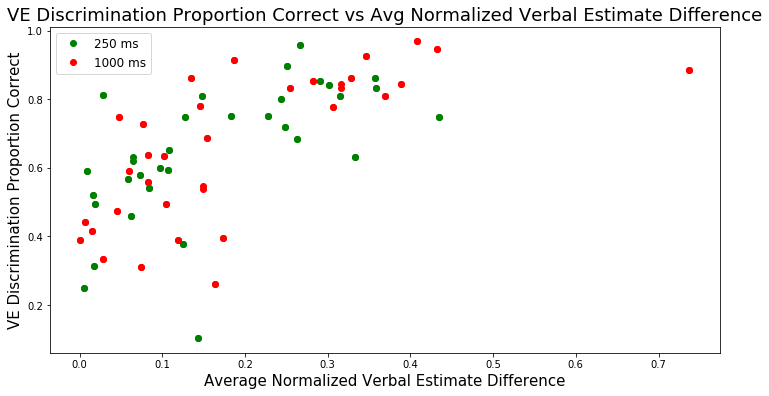

In [97]:
plt.figure(figsize=[12,6])
plt.plot(np.array(n_VE_estim_diff_250), np.array(n_VE_accuracy_250), 'go', label='250 ms')
plt.plot(np.array(n_VE_estim_diff_1000), np.array(n_VE_accuracy_1000), 'ro', label='1000 ms')
plt.xlabel('Average Normalized Verbal Estimate Difference', fontsize=15)
plt.ylabel('VE Discrimination Proportion Correct', fontsize = 15)
plt.legend(fontsize = 12)
plt.title('VE Discrimination Proportion Correct vs Avg Normalized Verbal Estimate Difference', fontsize = 18)
plt.show();

m: [0.99011886]
b: 0.4832946794344122
R-squared:  0.38156741580945175


Text(0.5, 1.0, '250 ms: Accuracy')

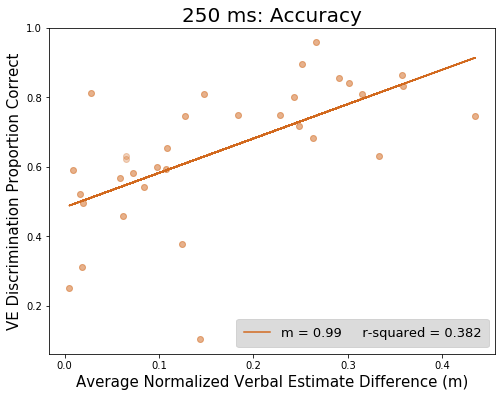

In [98]:
#run regression
plt.figure(figsize=[8,6])
VE_X_250 = np.array(n_VE_estim_diff_250).reshape(-1,1)
VE_PC_250 = n_VE_accuracy_250
VE_PC_reg_250 = LinearRegression().fit(VE_X_250, VE_PC_250)

#Generated Predictions
PC_predicted_250 = VE_PC_reg_250.predict(VE_X_250)
#Plot Our Actual and Predicted Values
plt.plot(VE_X_250, VE_PC_250, 'o', color='chocolate', alpha = 0.3);
plt.plot(VE_X_250, PC_predicted_250,color='chocolate', label = 'm = ' + str(round(VE_PC_reg_250.coef_[0], 3))
         + '     r-squared = ' + str(round(float(VE_PC_reg_250.score(VE_X_250, VE_PC_250)), 3)))
plt.xlabel("Average Normalized Verbal Estimate Difference (m)", fontsize = 15)
plt.ylabel("VE Discrimination Proportion Correct", fontsize = 15)

#get coefficients and y intercept
print("m: {0}".format(VE_PC_reg_250.coef_))
print("b: {0}".format(VE_PC_reg_250.intercept_))

#Returns the coefficient of determination R^2 of the prediction.
print("R-squared: ", VE_PC_reg_250.score(VE_X_250, VE_PC_250))


legend = plt.legend(loc = 4, fontsize = 13, borderpad = 0.6, labelspacing = 1)
legend.get_frame().set_facecolor('lightgray')

plt.title("250 ms: Accuracy", fontsize = 20)


m: [0.90973193]
b: 0.4863546606047693
R-squared:  0.4730429515365316


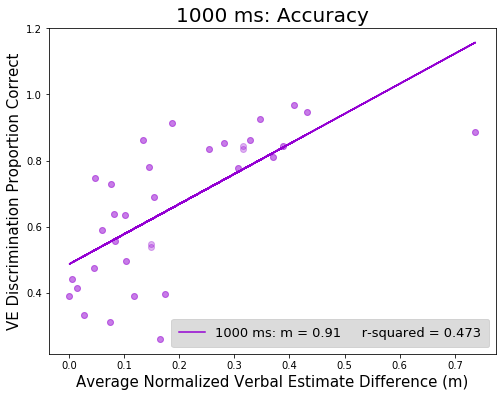

In [99]:
plt.figure(figsize=[8,6])

VE_X_1000 = np.array(n_VE_estim_diff_1000).reshape(-1,1)
VE_PC_1000 = n_VE_accuracy_1000
VE_PC_reg_1000 = LinearRegression().fit(VE_X_1000, VE_PC_1000)

#Generated Predictions
PC_predicted_1000 = VE_PC_reg_1000.predict(VE_X_1000)
#Plot Our Actual and Predicted Values
plt.plot(VE_X_1000, VE_PC_1000, 'o', color='darkviolet', alpha = 0.3);
plt.plot(VE_X_1000, PC_predicted_1000,color='darkviolet', label = '1000 ms: m = ' + str(round(VE_PC_reg_1000.coef_[0], 3))
         + '     r-squared = ' + str(round(float(VE_PC_reg_1000.score(VE_X_1000, VE_PC_1000)), 3)))

legend = plt.legend(loc = 4, fontsize = 13, borderpad = 0.6, labelspacing = 1)
legend.get_frame().set_facecolor('lightgray')

#get coefficients and y intercept
print("m: {0}".format(VE_PC_reg_1000.coef_))
print("b: {0}".format(VE_PC_reg_1000.intercept_))

#Returns the coefficient of determination R^2 of the prediction.
print("R-squared: ", VE_PC_reg_1000.score(VE_X_1000, VE_PC_1000))

plt.xlabel("Average Normalized Verbal Estimate Difference (m)", fontsize = 15)
plt.ylabel("VE Discrimination Proportion Correct", fontsize = 15)


plt.title("1000 ms: Accuracy", fontsize = 20)

plt.show();

In [100]:
stats.pearsonr(n_VE_accuracy_250, n_VE_accuracy_1000)

(0.2721432752121125, 0.02959434830833441)

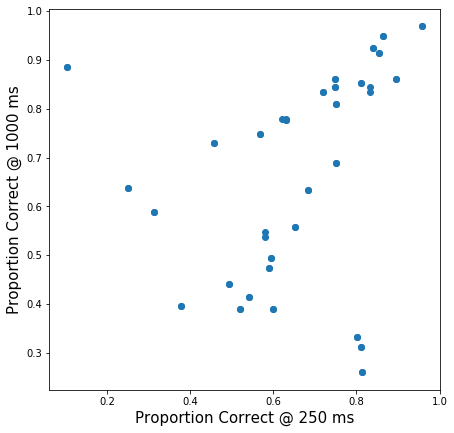

In [101]:
plt.figure(figsize=[7,7])
plt.xlabel('Proportion Correct @ 250 ms', fontsize=15)
plt.ylabel('Proportion Correct @ 1000 ms', fontsize=15)
plt.plot(n_VE_accuracy_250,n_VE_accuracy_1000, 'o' )

# UPDATED REGRESSOR: Difference between verbal judgements divided by joint variance 

In [102]:
print('250 ms: Correlation between VE discrimination accuracy and difference between normalized verbal judgements divided by joint variance ')
stats.pearsonr(n_VE_accuracy_250, n_JV_250)

250 ms: Correlation between VE discrimination accuracy and difference between normalized verbal judgements divided by joint variance 


(0.7136016849565938, 3.64342669820867e-11)

In [103]:
print('1000 ms: Correlation between VE discrimination accuracy and difference between verbal judgements divided by joint variance ')
stats.pearsonr(n_VE_accuracy_1000, n_JV_1000)

1000 ms: Correlation between VE discrimination accuracy and difference between verbal judgements divided by joint variance 


(0.7565846955545911, 4.805386781386678e-13)

m: [0.63289454]
b: 0.46107122446123355
R-squared:  0.5092273647728898


Text(0.5, 1.0, '250 ms')

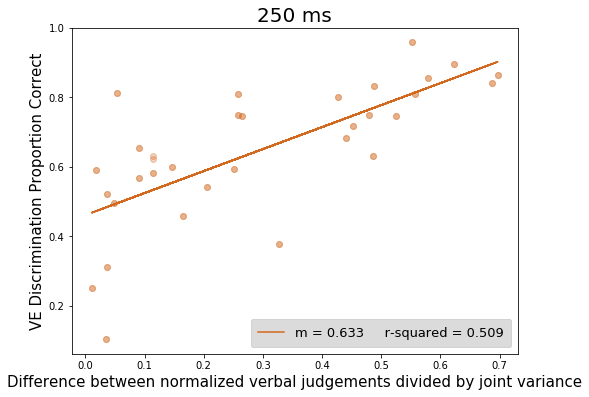

In [104]:
#run regression
plt.figure(figsize=[8,6])
JV_X_250 = np.array(n_JV_250).reshape(-1,1)
VE_PC_250 = n_VE_accuracy_250
JV_PC_reg_250 = LinearRegression().fit(JV_X_250, VE_PC_250)

#Generated Predictions
JV_PC_predicted_250 = JV_PC_reg_250.predict(JV_X_250)
#Plot Our Actual and Predicted Values
plt.plot(JV_X_250, VE_PC_250, 'o', color='chocolate', alpha = 0.3);
plt.plot(JV_X_250, JV_PC_predicted_250,color='chocolate', label = 'm = ' + str(round(JV_PC_reg_250.coef_[0], 3))
         + '     r-squared = ' + str(round(float(JV_PC_reg_250.score(JV_X_250, VE_PC_250)), 3)))
plt.xlabel("Difference between normalized verbal judgements divided by joint variance", fontsize = 15)
plt.ylabel("VE Discrimination Proportion Correct", fontsize = 15)

#get coefficients and y intercept
print("m: {0}".format(JV_PC_reg_250.coef_))
print("b: {0}".format(JV_PC_reg_250.intercept_))

#Returns the coefficient of determination R^2 of the prediction.
print("R-squared: ", JV_PC_reg_250.score(JV_X_250, VE_PC_250))


legend = plt.legend(loc = 4, fontsize = 13, borderpad = 0.6, labelspacing = 1)
legend.get_frame().set_facecolor('lightgray')

plt.title("250 ms", fontsize = 20)


m: [0.53981022]
b: 0.46760503945704485
R-squared:  0.572420401547433


Text(0.5, 1.0, '1000 ms')

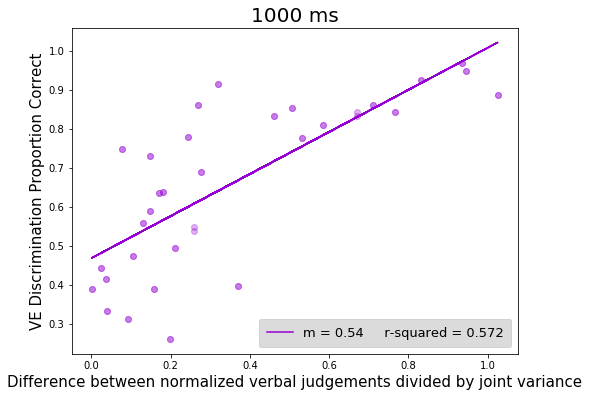

In [105]:
#run regression
plt.figure(figsize=[8,6])
JV_X_1000 = np.array(n_JV_1000).reshape(-1,1)
VE_PC_1000 = n_VE_accuracy_1000
JV_PC_reg_1000 = LinearRegression().fit(JV_X_1000, VE_PC_1000)

#Generated Predictions
JV_PC_predicted_1000 = JV_PC_reg_1000.predict(JV_X_1000)
#Plot Our Actual and Predicted Values
plt.plot(JV_X_1000, VE_PC_1000, 'o', color='darkviolet', alpha = 0.3);
plt.plot(JV_X_1000, JV_PC_predicted_1000,color='darkviolet', label = 'm = ' + str(round(JV_PC_reg_1000.coef_[0], 3))
         + '     r-squared = ' + str(round(float(JV_PC_reg_1000.score(JV_X_1000, VE_PC_1000)), 3)))
plt.xlabel("Difference between normalized verbal judgements divided by joint variance", fontsize = 15)
plt.ylabel("VE Discrimination Proportion Correct", fontsize = 15)

#get coefficients and y intercept
print("m: {0}".format(JV_PC_reg_1000.coef_))
print("b: {0}".format(JV_PC_reg_1000.intercept_))

#Returns the coefficient of determination R^2 of the prediction.
print("R-squared: ", JV_PC_reg_1000.score(JV_X_1000, VE_PC_1000))


legend = plt.legend(loc = 4, fontsize = 13, borderpad = 0.6, labelspacing = 1)
legend.get_frame().set_facecolor('lightgray')

plt.title("1000 ms", fontsize = 20)


(0.606883190203107, 1.060730053410517e-07)


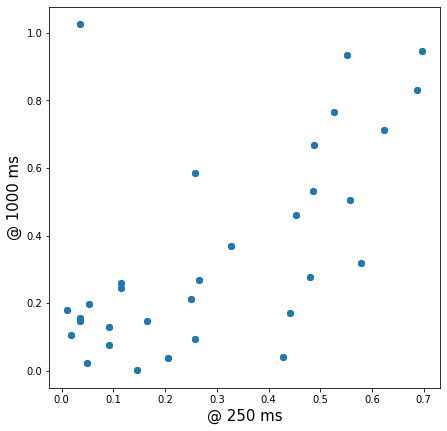

In [106]:
print(stats.pearsonr(n_JV_250, n_JV_1000))
plt.figure(figsize=[7,7])
plt.xlabel('@ 250 ms', fontsize=15)
plt.ylabel('@ 1000 ms', fontsize=15)
plt.plot(n_JV_250,n_JV_1000, 'o' )

In [107]:
print('250 ms: Correlation between average discrimination RT and difference between verbal judgements divided by joint variance ')
stats.pearsonr(n_avg_RT_250, n_JV_250)

250 ms: Correlation between average discrimination RT and difference between verbal judgements divided by joint variance 


(-0.41527035007208185, 0.0006444768743489928)

In [108]:
print('1000 ms: Correlation between average discrimination RT and difference between verbal judgements divided by joint variance ')
stats.pearsonr(n_avg_RT_1000, n_JV_1000)

1000 ms: Correlation between average discrimination RT and difference between verbal judgements divided by joint variance 


(-0.5235359785616431, 9.035694052132743e-06)

m: [-144.31781311]
b: 1309.984666409662
R-squared:  0.17244946364898894


Text(0.5, 1.0, '250 ms: RT')

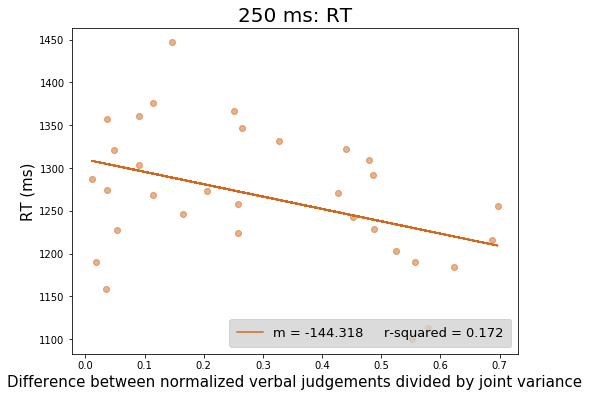

In [109]:
#run regression
plt.figure(figsize=[8,6])
JV_X_250 = np.array(n_JV_250).reshape(-1,1)
VE_PC_250 = n_avg_RT_250
JV_PC_reg_250 = LinearRegression().fit(JV_X_250, VE_PC_250)

#Generated Predictions
JV_PC_predicted_250 = JV_PC_reg_250.predict(JV_X_250)
#Plot Our Actual and Predicted Values
plt.plot(JV_X_250, VE_PC_250, 'o', color='chocolate', alpha = 0.3);
plt.plot(JV_X_250, JV_PC_predicted_250,color='chocolate', label = 'm = ' + str(round(JV_PC_reg_250.coef_[0], 3))
         + '     r-squared = ' + str(round(float(JV_PC_reg_250.score(JV_X_250, VE_PC_250)), 3)))
plt.xlabel("Difference between normalized verbal judgements divided by joint variance", fontsize = 15)
plt.ylabel("RT (ms)", fontsize = 15)

#get coefficients and y intercept
print("m: {0}".format(JV_PC_reg_250.coef_))
print("b: {0}".format(JV_PC_reg_250.intercept_))

#Returns the coefficient of determination R^2 of the prediction.
print("R-squared: ", JV_PC_reg_250.score(JV_X_250, VE_PC_250))


legend = plt.legend(loc = 4, fontsize = 13, borderpad = 0.6, labelspacing = 1)
legend.get_frame().set_facecolor('lightgray')

plt.title("250 ms: RT", fontsize = 20)

m: [-96.27131166]
b: 1131.3157618038026
R-squared:  0.2740899208484966


Text(0.5, 1.0, '1000 ms: RT')

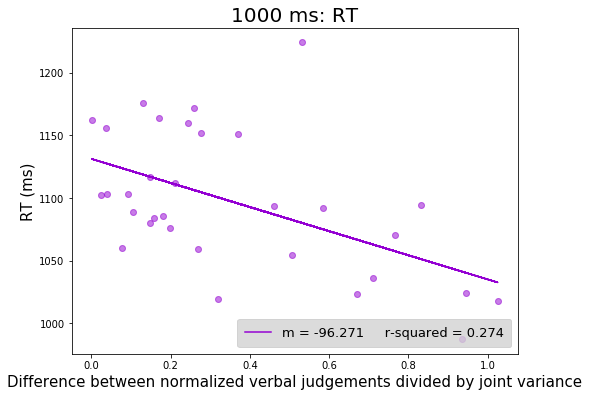

In [110]:
#run regression
plt.figure(figsize=[8,6])
JV_X_1000 = np.array(n_JV_1000).reshape(-1,1)
VE_PC_1000 = n_avg_RT_1000
JV_PC_reg_1000 = LinearRegression().fit(JV_X_1000, VE_PC_1000)

#Generated Predictions
JV_PC_predicted_1000 = JV_PC_reg_1000.predict(JV_X_1000)
#Plot Our Actual and Predicted Values
plt.plot(JV_X_1000, VE_PC_1000, 'o', color='darkviolet', alpha = 0.3);
plt.plot(JV_X_1000, JV_PC_predicted_1000,color='darkviolet', label = 'm = ' + str(round(JV_PC_reg_1000.coef_[0], 3))
         + '     r-squared = ' + str(round(float(JV_PC_reg_1000.score(JV_X_1000, VE_PC_1000)), 3)))
plt.xlabel("Difference between normalized verbal judgements divided by joint variance", fontsize = 15)
plt.ylabel("RT (ms)", fontsize = 15)

#get coefficients and y intercept
print("m: {0}".format(JV_PC_reg_1000.coef_))
print("b: {0}".format(JV_PC_reg_1000.intercept_))

#Returns the coefficient of determination R^2 of the prediction.
print("R-squared: ", JV_PC_reg_1000.score(JV_X_1000, VE_PC_1000))


legend = plt.legend(loc = 4, fontsize = 13, borderpad = 0.6, labelspacing = 1)
legend.get_frame().set_facecolor('lightgray')

plt.title("1000 ms: RT", fontsize = 20)